In [1]:
# use pytorch_env

import os

import numpy as np
import pandas as pd
import seaborn as sns

import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from xml.etree import ElementTree, ElementInclude

import pickle

In [2]:
path = '/home/simon/Documents/Bodies/data/jeppe/images'

In [3]:
def get_df(path):


    name = []
    xmin = []
    xmax = []
    ymin = []
    ymax = []
    width = []
    height = []
    depth = []
    sh = []
    filenames = []

    for filename in os.listdir(path):
        if filename.split('.')[1] == 'xml':

            file_path = os.path.join(path, filename)
                
            tree = ElementTree.parse(file_path)
                
            # Check if the file name in the xml matches thej actual file:
            filename_ = tree.findall('filename')[0].text
            if not filename_.split('.')[0] == filename.split('.')[0]:
                print(f'problem! {filename_.split(".")[0]} != {filename.split(".")[0]}')
                    #break

            # If it does; we go:
            else:

                lst_obj = tree.findall('object')
                lst_size = tree.findall('size')
                n_obj = len(lst_obj)

                for i in lst_obj:

                    name.append(i.find('name').text)
                    lst_box = i.findall('bndbox')

                    for j in lst_box:

                        xmin.append(j.find('xmin').text)
                        xmax.append(j.find('xmax').text)
                        ymin.append(j.find('ymin').text)
                        ymax.append(j.find('ymax').text)


                for k in lst_size:
                    
                    # OLD
                    # for l in range(n_obj): 
                    # this is dump - you append the same img size over and over to entries for each...
                    # Info is unversial for whole image, so I broadcast it out to each object in image

                        # width.append(k.find('width').text)
                        # height.append(k.find('height').text)
                        # depth.append(k.find('depth').text)
                        # filenames.append(filename_.split('.')[0]) # use the one from inside the file

                    # NEW:
                    width += [k.find('width').text] * n_obj
                    height += [k.find('height').text] * n_obj
                    depth += [k.find('depth').text] * n_obj
                    filenames += [filename_.split('.')[0]] * n_obj

                    #break # to only get one image

        #break # to onluy get one sh

    columns = ['img_id', 'feature', 'xmin', 'xmax', 'ymin', 'ymax', 'width', 'height', 'depth']
    df = pd.DataFrame(list(zip(filenames, name, xmin, xmax, ymin, ymax, width, height, depth)), columns = columns)

    df['xmin'] = df['xmin'].astype('float64')
    df['xmax'] = df['xmax'].astype('float64')
    df['ymin'] = df['ymin'].astype('float64')
    df['ymax'] = df['ymax'].astype('float64')
    df['width'] = df['width'].astype('float64')
    df['height'] = df['height'].astype('float64')
    df['depth'] = df['depth'].astype('int')

    return(df)

df = get_df(path)

In [4]:
df.sample(10)

,img_id,feature,xmin,xmax,ymin,ymax,width,height,depth
5557,JS7169,person,821.0,1408.0,504.0,1137.0,2000.0,1312.0,3
3315,JS11142,uniformed,472.0,2272.0,1.0,1923.0,3008.0,1960.0,3
5617,JS8242,flag_iraqi,33.0,2929.0,390.0,1520.0,3008.0,1960.0,3
3586,JS811,person,203.0,572.0,34.0,363.0,2000.0,1312.0,3
1221,JS38838,person,1295.0,1430.0,110.0,342.0,2000.0,1312.0,3
2945,JS12672,religious_garment_female,446.0,703.0,250.0,623.0,2000.0,1312.0,3
999,JS5838,male,491.0,1371.0,42.0,1092.0,2000.0,1312.0,3
5003,JS841,adult,250.0,596.0,214.0,585.0,2000.0,1312.0,3
877,JS30805,person,1173.0,1839.0,1.0,840.0,2000.0,1312.0,3
3736,JS18915,male,2281.0,2597.0,616.0,1504.0,3008.0,1960.0,3


In [5]:
df.shape

(7009, 9)

In [6]:
df['feature'].unique()

array(['person', 'adult', 'male', 'elderly', 'firearm',
       'military_vehicle', 'female', 'religious_garment_female',
       'uniformed', 'flag_iraqi', 'flag_us', 'casualty', 'child', 'youth',
       'prayer_salah', 'infant', 'hostage', 'blooded_area',
       'prayer_informal'], dtype=object)

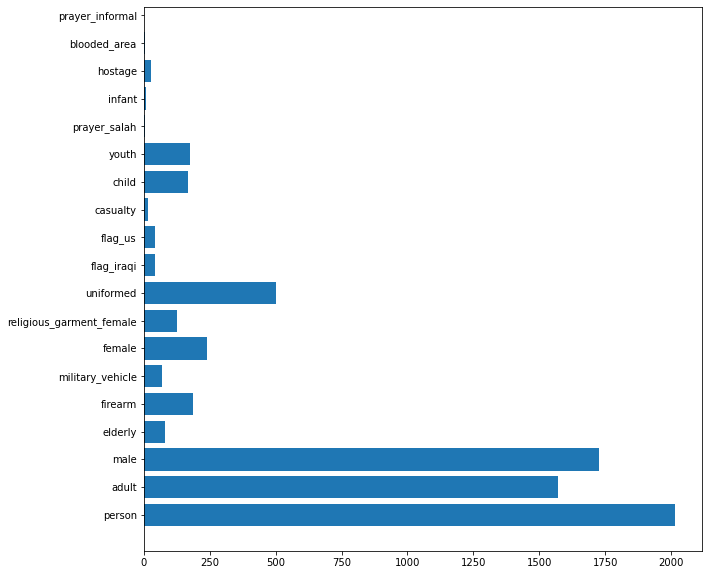

In [7]:
plt.figure(figsize = [10,10])
plt.hist(df['feature'], bins = np.arange(df['feature'].unique().shape[0]) - 0.5, rwidth = 0.8, orientation="horizontal")
plt.show()

In [8]:
# Pickle the dataset.

file_name = "df.pkl"
output = open(file_name, 'wb') 
pickle.dump(df, output)
output.close()